In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from imageio import imread
from PIL import Image
import numpy as np 

%matplotlib inline

In [2]:
def create_wordcloud(image_name,contents):
	authors = ' '
	for content in contents:
		content = eval(content)
		author = content['作者']
		author += ' '
		authors += author
	bg = imread(image_name)
	wc = WordCloud(font_path='msyhbd.ttc',background_color='white',
					max_words=2000,mask=bg,random_state=200)
	wc.generate(authors)
	wc.to_file('result.png')
	print('成功生成词云图')
	img = Image.open('result.png')
	plt.figure(figsize=(10,10))
	plt.imshow(img)
	plt.axis('off')
	plt.show()

成功生成词云图


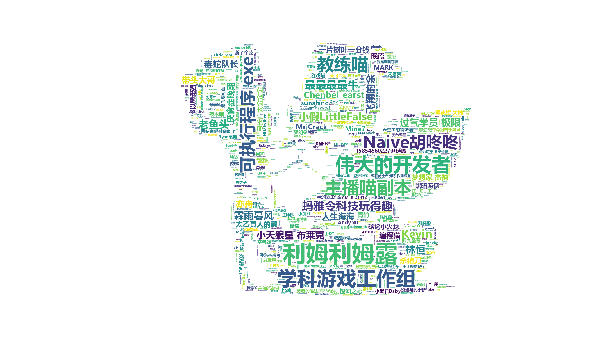

In [3]:
with open("kitten作品信息.txt",'r',encoding='utf-8') as f:
		contents = f.readlines()
create_wordcloud('猫老祖.png',contents)

In [10]:
def figure_show(x,y,color='dodgerblue',title='浏览次数排行',legend='views'):

    
	plt.figure(figsize=(15,6))
	plt.rcParams['font.sans-serif']=['SimHei']
	#plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
	rects = plt.bar(x,y,color=color)
	plt.plot(x,y)
	plt.legend([legend],fontsize=10)
	index = 0
	font = {'style':'normal','size':10}
	for rect in rects:
		height = rect.get_height()
		plt.text(rect.get_x() + rect.get_width()*0.5,1.01*height,str(height),ha='center',va='bottom',fontdict=font)
		index += 1
	plt.xticks(fontsize=8)
	plt.yticks(fontsize=8)
	plt.title(title)
	#plt.savefig('result.png')
	plt.show()

def create_views_bar(contents):
	authors_works = []
	total_views = []
	for content in contents[:10]:
		content = eval(content)
		author = content['作者']
		work = content['作品']
		author_work = author + '\n' + work
		authors_works.append(author_work)
		total_views.append(content['浏览次数'])
	
	figure_show(authors_works,total_views)


def price_point_bar(contents):
	total_price_points = []
	for content in contents:
		#print(content)
		content = eval(content)
		total_price_points.append(content['点赞次数'])
	total_price_points.sort(reverse=True)
	#print(total_price_points)
	total_price_points = total_price_points[:10]
	#print(total_price_points)
	authors_works = []
	for point in total_price_points:
		for content in contents:
			content = eval(content)
			if point == content['点赞次数']:
				authors_works.append(content['作者']+'\n'+content['作品'])
				break

	figure_show(authors_works,total_price_points,color='green',title='点赞次数排行',legend='pricePoint')


def create_rate_bar(contents):

	rate_dict = {}
	rates = []
	authors_works = []
	for content in contents:
		content = eval(content)
		views = content['浏览次数'] 
		price_points = content['点赞次数']
		author = content['作者']
		work = content['作品']
		if views >= 10000:
			rate_dict[author+'\n'+work] = round(price_points/views,4)
	for key,value in rate_dict.items():
		rates.append(value)
	rates.sort(reverse=True)
	rates = rates[:10]
	
	for rate in rates:
		for key,value in rate_dict.items():
			if rate == value:
				authors_works.append(key)
				break
	
	figure_show(authors_works,rates,color='tomato',title='点赞率排行榜',legend='rates')

    
def create_num_pie(contents):
	
	views = []
	for content in contents:
		content = eval(content)
		views.append(content['浏览次数'])
	views.sort()
	a = len([i for i in views if i >= 10000])
	b = len ([i for i in views if i >= 5000]) - a
	c = len ([i for i in views if i >= 1000]) - a -b 
	d = len(views) - a - b - c 
	nums = [a,b,c,d]
	explode = [0,0,0,0.05]
	labels = ['A>=10000', '10000>B>=5000', '5000>C>=1000', '1000>D']
	plt.rcParams['font.sans-serif']=['SimHei']
	plt.figure(figsize=(10,10))
	plt.axes(aspect=1) #这样子设置饼才是圆的，否则椭圆
	plt.pie(nums,labels=labels,explode=explode,autopct='%3.1f%%',shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
	plt.title('浏览次数分布')
	plt.show()

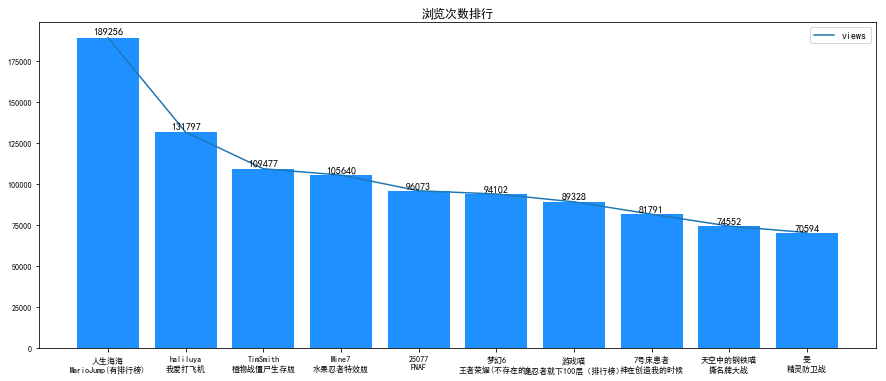

In [5]:
create_views_bar(contents)

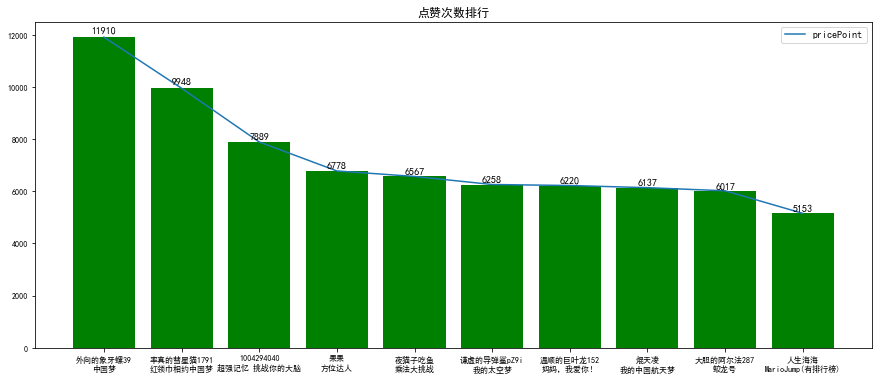

In [6]:
price_point_bar(contents)

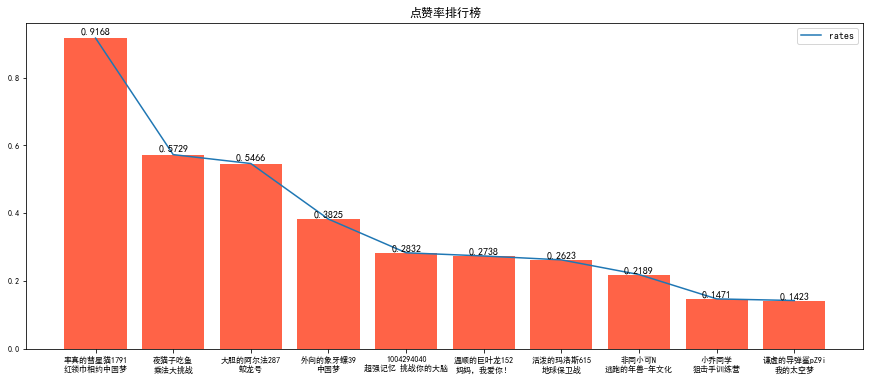

In [7]:
create_rate_bar(contents)

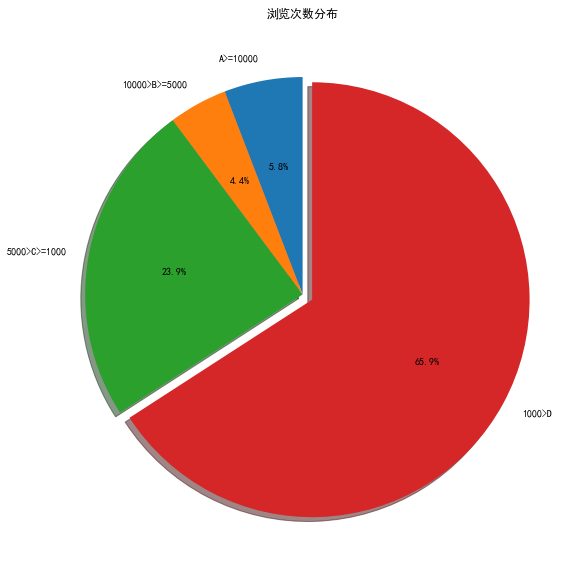

In [11]:
create_num_pie(contents)